In [37]:
pip install pytrends matplotlib pandas seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

### Setup Pytrend Library and Keyword Define

In [39]:
pytrends = TrendReq(hl = 'en-US', tz=360)
keyword = "cloud computing"

### Data Request

In [43]:
pytrends.build_payload([keyword], cat=0, timeframe = 'today 12-m', geo='', gprop = '')

### Country wise Request

In [44]:
region_data= pytrends. interest_by_region()
region_data= region_data.sort_values(by= keyword,ascending=False).head(15)

C:\Users\vghat\AppData\Local\Temp\ipykernel_1856\2572076145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot (x = region_data['cloud computing'], y = region_data.index, palette='Blues_d')


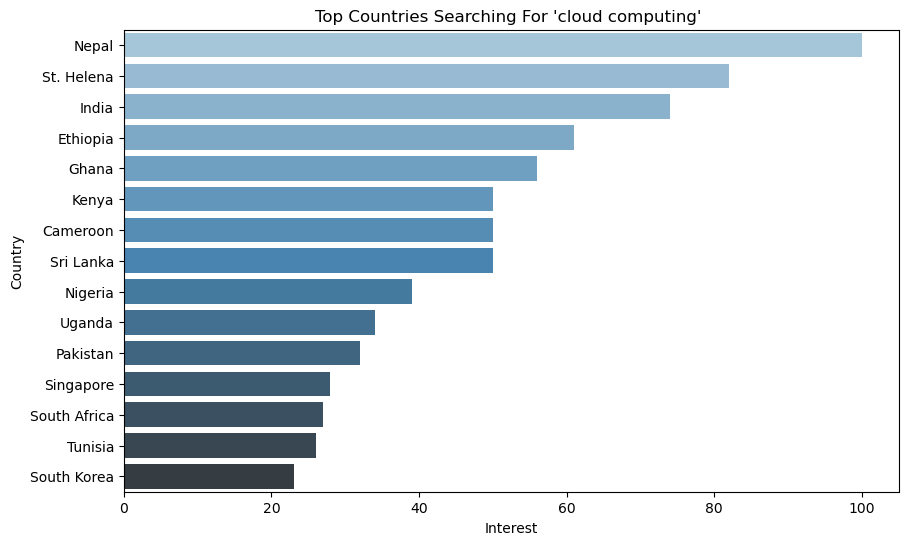

In [46]:
plt.figure (figsize = (10,6))
sns.barplot (x = region_data['cloud computing'], y = region_data.index, palette='Blues_d')
plt.title(f"Top Countries Searching For '{'cloud computing'}' " )
plt.xlabel ("Interest")
plt.ylabel ("Country")
plt.show()

### World Map

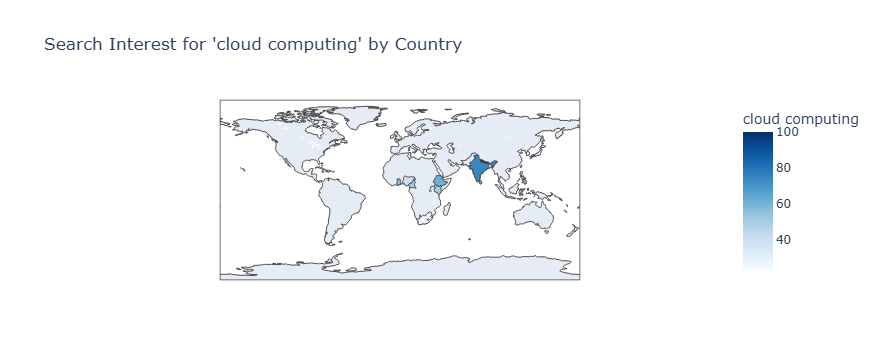

In [54]:
# Option 1: Reset index with drop=True to avoid creating a new column
region_data = region_data.reset_index(drop=True)

# Option 2: Reset index with a specific name for the index column
# region_data = region_data.reset_index(names='region_index')

fig = px.choropleth(
    region_data,
    locations='geoName',
    locationmode='country names',
    color=keyword,
    title=f"Search Interest for '{keyword}' by Country",
    color_continuous_scale='Blues'
)
fig.show()

### Time Wise Interest

In [55]:
time_df = pytrends.interest_over_time()

C:\Users\vghat\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



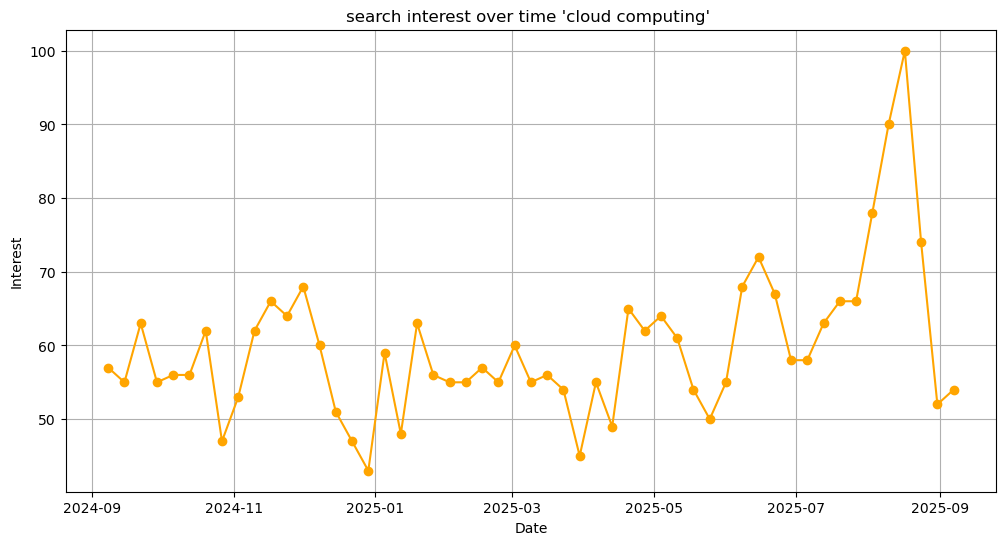

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(time_df.index, time_df[keyword], marker='o', color='orange')
plt.title(f"search interest over time '{keyword}' ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()


### Multiple Keywords Compare

In [59]:
kw_list = ["cloud computing", "data science", "machine learning"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')

C:\Users\vghat\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



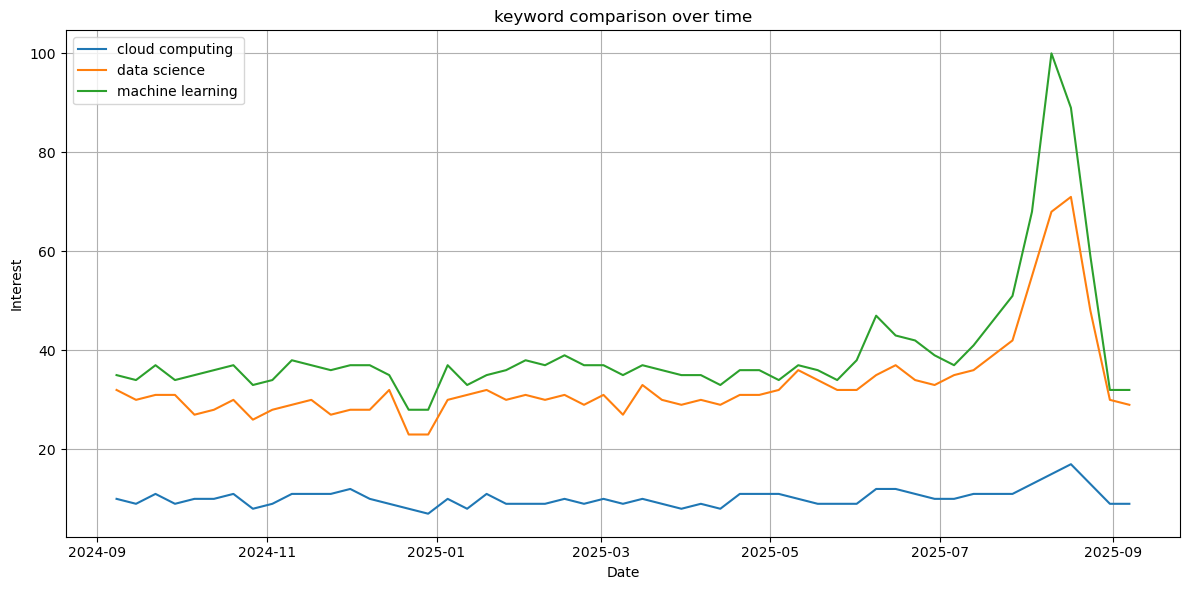

In [60]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12, 6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label=kw)

plt.title("keyword comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()